In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_csv('students_adaptability_level_online_education.csv')

In [28]:
data

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low


In [29]:
data.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [31]:
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [32]:
data.tail()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low
1204,School,Private,Female,11,Mobile,No,Town,Poor,Mobile Data,3G,Moderate


In [33]:
data.isnull().sum()

Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

In [34]:
data.duplicated().sum()

980

In [35]:
data.shape, data.size

((1205, 11), 13255)

In [36]:
data.nunique()

Education Level        3
Institution Type       2
Gender                 2
Age                    6
Device                 3
IT Student             2
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Flexibility Level      3
dtype: int64

# DATA VISUALIZATION

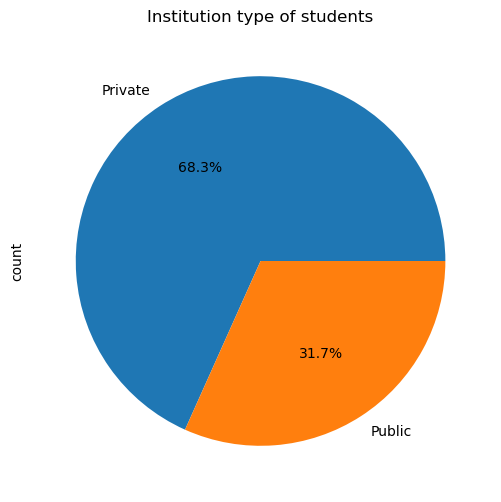

In [37]:
plt.figure(figsize=(12,6))
data['Institution Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Institution type of students')
plt.xlabel('')
plt.show()

In [38]:
data['Institution Type'].value_counts()

Institution Type
Private    823
Public     382
Name: count, dtype: int64

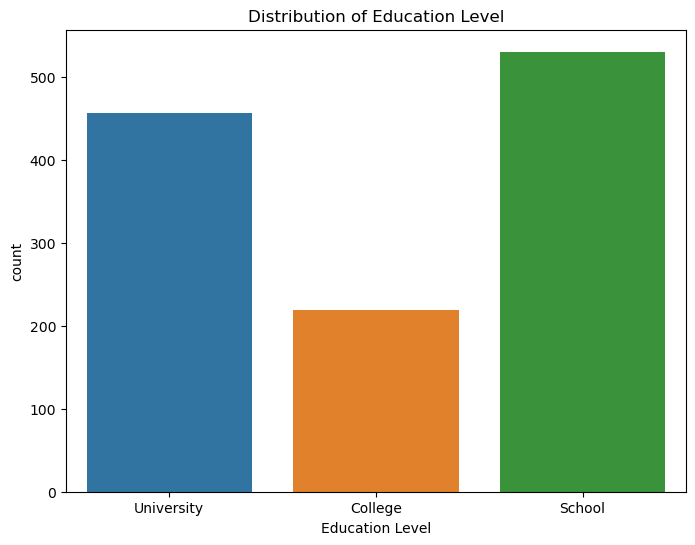

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='Education Level', data=data)
plt.title('Distribution of Education Level')
plt.show()

In [40]:
data['Education Level'].value_counts()

Education Level
School        530
University    456
College       219
Name: count, dtype: int64

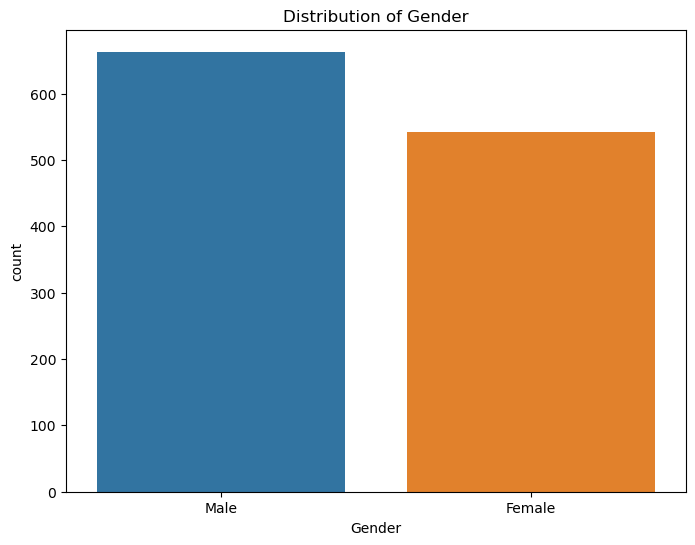

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=data)
plt.title('Distribution of Gender')
plt.show()

In [42]:
data['Gender'].value_counts()

Gender
Male      663
Female    542
Name: count, dtype: int64

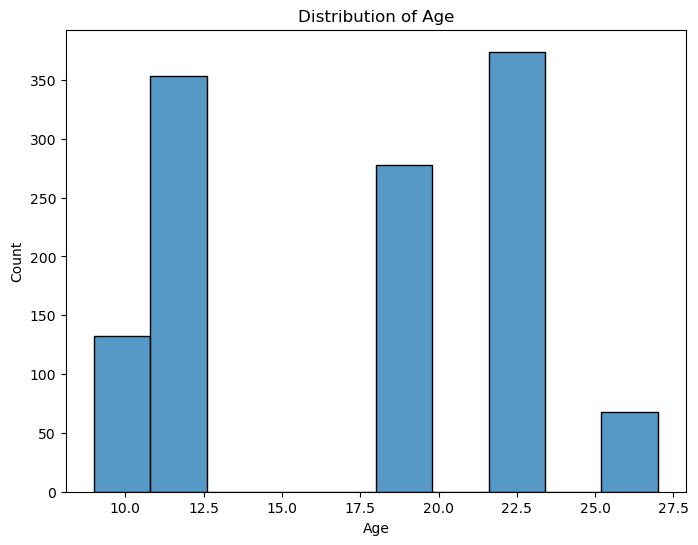

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(x='Age',data=data, bins=10)
plt.title('Distribution of Age')
plt.show()

In [44]:
data['Age'].value_counts()

Age
23    374
11    353
18    278
9      81
27     68
10     51
Name: count, dtype: int64

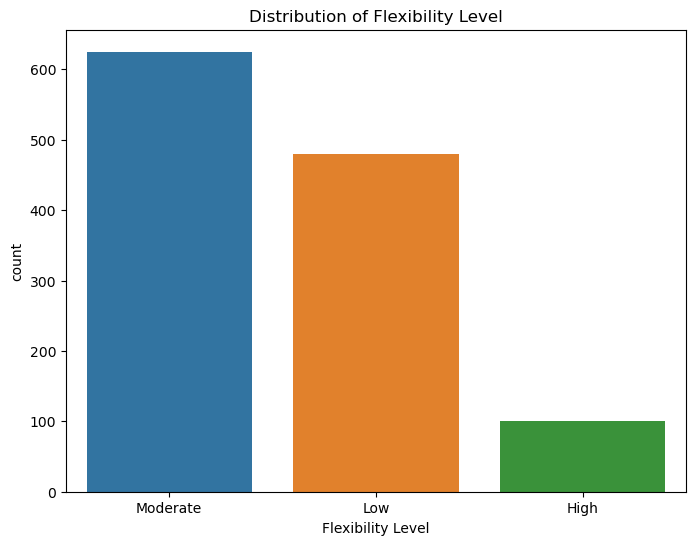

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='Flexibility Level', data=data)
plt.title('Distribution of Flexibility Level')
plt.show()

In [46]:
data['Flexibility Level'].value_counts()

Flexibility Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

# Label Encoder

In [49]:
le=LabelEncoder()
data['Education Level']=le.fit_transform(data['Education Level'])
data['Institution Type']=le.fit_transform(data['Institution Type'])
data['Gender']=le.fit_transform(data['Gender'])
data['Device']=le.fit_transform(data['Device'])
data['IT Student']=le.fit_transform(data['IT Student'])
data['Location']=le.fit_transform(data['Location'])
data['Financial Condition']=le.fit_transform(data['Financial Condition'])
data['Internet Type']=le.fit_transform(data['Internet Type'])
data['Network Type']=le.fit_transform(data['Network Type'])
data['Flexibility Level']=le.fit_transform(data['Flexibility Level'])

In [52]:
#split data into training and testing sets
x=data.drop('Flexibility Level', axis=1)
y=data['Flexibility Level']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

# Logistic Regression

In [53]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
#make prediction 
y_pred=lr.predict(x_test)

In [55]:
#evaluate the model
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy: 0.6390041493775933
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.70      0.50      0.59       103
           2       0.60      0.81      0.69       115

    accuracy                           0.64       241
   macro avg       0.67      0.57      0.59       241
weighted avg       0.65      0.64      0.63       241

